# Lab Assignment 2 : Regression or SVM

We are going to train a model that can predict whether a patient has a cardiovascular disease or not. 
We will be using a logistic regression. 

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

# Get the data : cleaning, exploration and visualization

In [2]:
df = pd.read_csv('cardio.csv',';')
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [3]:
df.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

In [4]:
df.shape

(70000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
df['age'] = round(df['age']/365) #age conversion from days to years

In [7]:
df['age']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: age, Length: 70000, dtype: float64

In [8]:
df = df.drop(columns=['id']) #drop id column because it is not useful

In [9]:
df.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0  50.0       2     168    62.0    110     80            1     1      0     0   
1  55.0       1     156    85.0    140     90            3     1      0     0   
2  52.0       1     165    64.0    130     70            3     1      0     0   
3  48.0       2     169    82.0    150    100            1     1      0     0   
4  48.0       1     156    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0

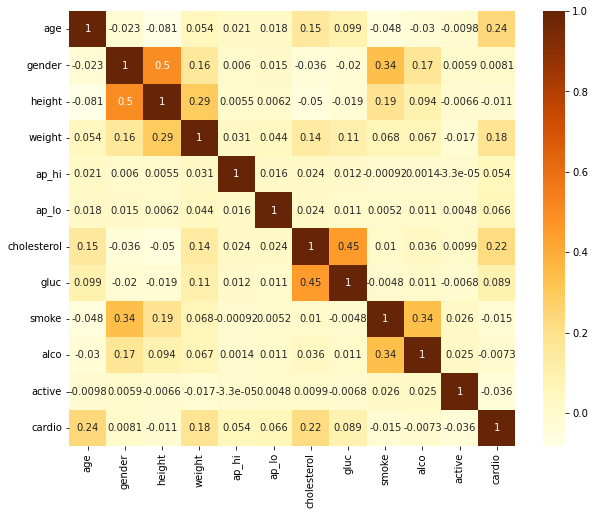

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='YlOrBr')
fig = plt.gcf()
fig.set_size_inches(10,8)

#this heatmap allows us to see which data are relevant with cardio variable according to the cardio line

In [11]:
df = df.drop(columns=['active','alco','smoke','height']) 
#we saw that these columns are the least relevant ones, so we dropped them

In [12]:
df.head()

age  gender  weight  ap_hi  ap_lo  cholesterol  gluc  cardio
0  50.0       2    62.0    110     80            1     1       0
1  55.0       1    85.0    140     90            3     1       1
2  52.0       1    64.0    130     70            3     1       1
3  48.0       2    82.0    150    100            1     1       1
4  48.0       1    56.0    100     60            1     1       0

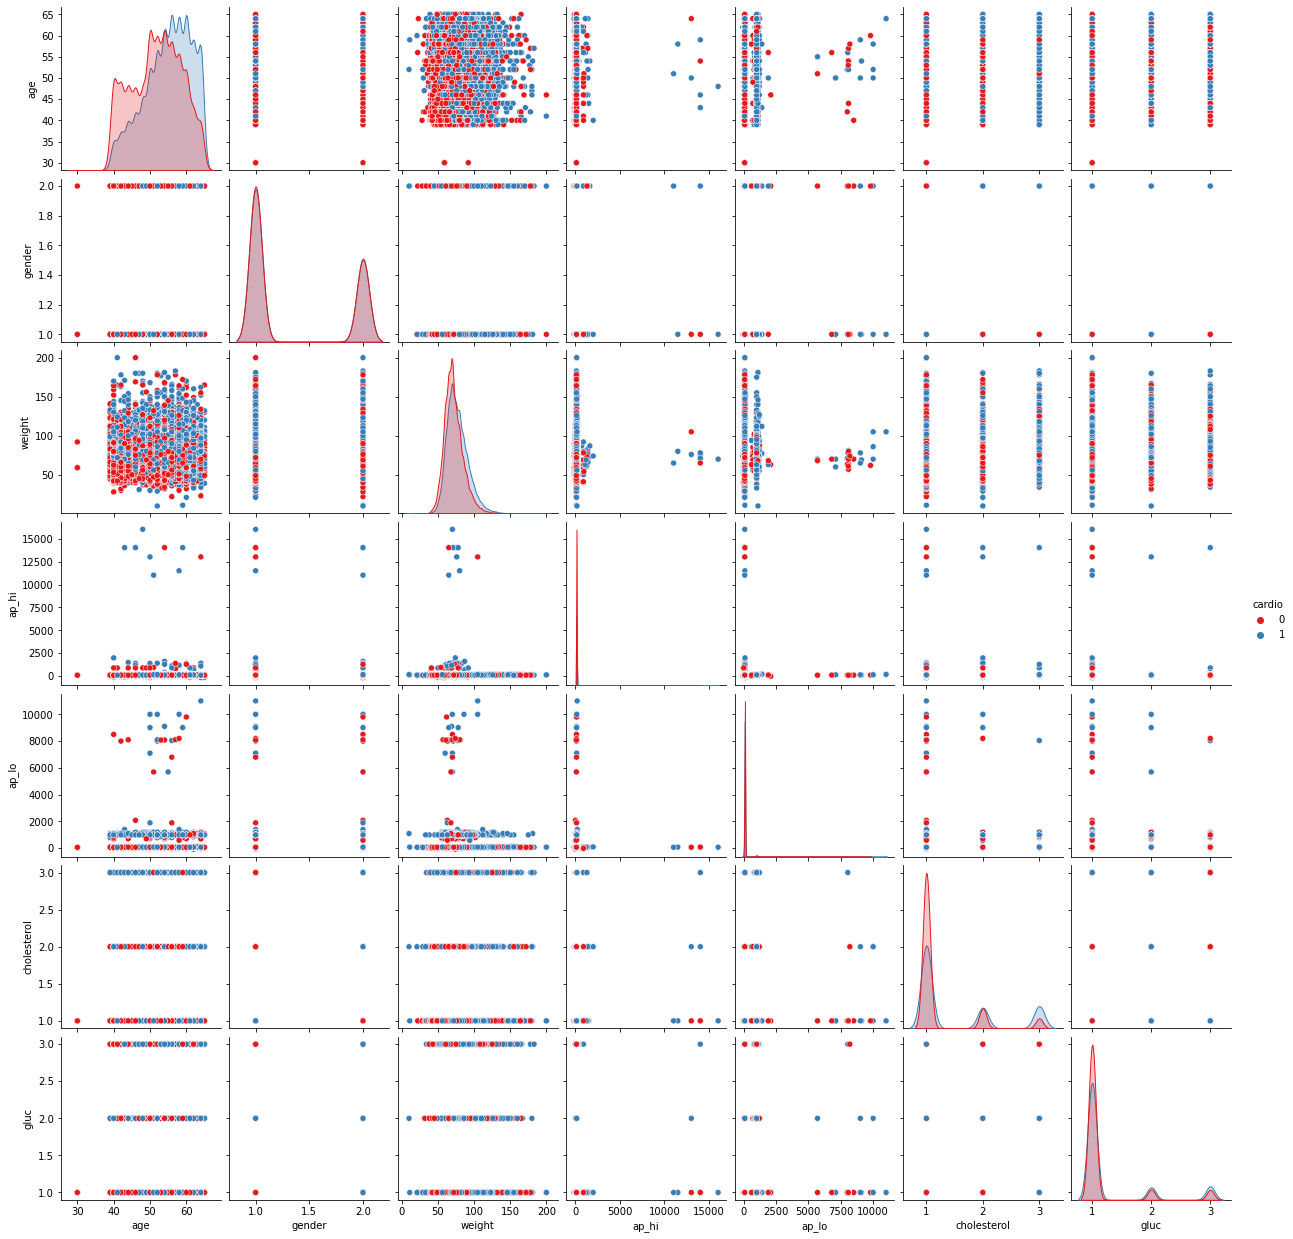

In [13]:
sns.pairplot(df, hue = "cardio", palette = "Set1")
#The Pairplot allows us to plot relationships between data within the dataset which creating a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

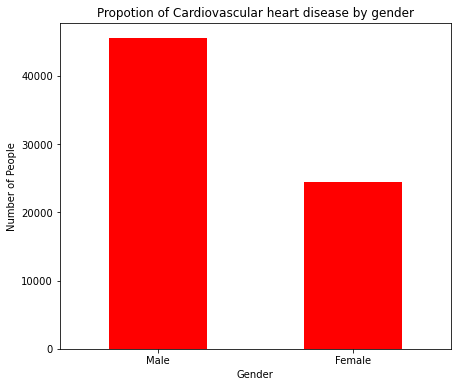

In [14]:
#Distribution of cardiovascular heart disease by gender
gender = df['gender'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color="r")
ax.set_title("Propotion of Cardiovascular heart disease by gender", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Male', 'Female'))

#We can see that males have a higher probability to contract a cardiovascular disease.

age mean 53.33868571428572
age median 54.0


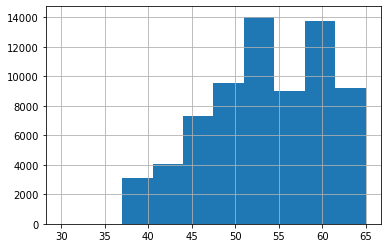

In [15]:
df['age'].hist()
print('age mean',df['age'].mean())
print('age median',df['age'].median())

# Train dataset and test dataset split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('cardio',axis=1)
y = df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [18]:
X_train.head()

age  gender  weight  ap_hi  ap_lo  cholesterol  gluc
20462  59.0       1    67.0    120     80            1     1
59648  46.0       1    78.0    140     90            1     1
33399  40.0       1    70.0    120     80            1     3
1454   46.0       1    74.0    130     90            1     1
27406  64.0       1    67.0    140     90            1     1

# Training a logistic regression model

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_reg = LogisticRegression()

In [21]:
log_reg.fit(X_train, y_train)

LogisticRegression()

# Logistic regression model's prediction on test dataset

In [22]:
log_prediction = log_reg.predict(X_test)

# Evaluation of the performance of the logistic regression model's prediction

The accuracy score is: 0.7053333333333334
Sensitivity (TPR) = 0.6458831404800612

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.69      0.76      0.72     10543
           1       0.73      0.65      0.69     10457

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.70     21000
weighted avg       0.71      0.71      0.70     21000



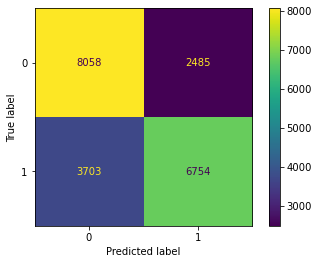

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report,plot_confusion_matrix

logreg_acc = accuracy_score(y_test, log_prediction)
cm = confusion_matrix(y_test, log_prediction) # Confusion matrix 
tpr_logreg = cm[1][1] /(cm[1][0] + cm[1][1])

print('The accuracy score is:', logreg_acc) # accuracy score
print('Sensitivity (TPR) =', tpr_logreg) 

print('\n Confusion matrix \n \n')
print(classification_report(y_test, log_prediction))

plot_confusion_matrix(log_reg, X_test, y_test)
plt.show()

#In yellow, we can see the true positive and in green we can see the true negative.
#That means that there are 8058 people who have a cardiovascular disease and 6754 who don't have a cardiovascular disease.

#We have a precision of 73% for true positive and a precision of 69% for true negative.

# Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training a SVM model

In [25]:
from sklearn.svm import SVC

In [26]:
model1 = SVC(kernel = 'linear', random_state = 0)
model1.fit(X_train, y_train)

model2 = SVC(kernel = 'rbf', random_state = 0)
model2.fit(X_train, y_train)

model3 = SVC(kernel = 'poly', random_state = 0)
model3.fit(X_train, y_train)

model4 = SVC(kernel = 'sigmoid', random_state = 0)
model4.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=0)

# Prediction of the SVM model

In [27]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)

# Performance evaluation (kernel : linear, rbf, poly and sigmoid)
Kernel SVM rbf is the best (73% of accuracy)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

svm_acc1 = accuracy_score(y_test, y_pred1)
cm1 = confusion_matrix(y_test, y_pred1) # Confusion matrix 
tpr_svm1 = cm1[1][1] /(cm1[1][0] + cm1[1][1])

print('The accuracy score is:', svm_acc1) # accuracy score
print('Sensitivity (TPR) = ', tpr_svm1) 

print('\nLinear - Confusion matrix \n')
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1,'\n')
print(classification_report(y_test, y_pred1))

#There are 8632 people who have a cardiovascular disease and 6555 who don't have a cardiovascular disease.

#We have a accuracy of 72%.

The accuracy score is: 0.7231904761904762
Sensitivity (TPR) =  0.6268528258582767

Linear - Confusion matrix 

[[8632 1911]
 [3902 6555]] 

              precision    recall  f1-score   support

           0       0.69      0.82      0.75     10543
           1       0.77      0.63      0.69     10457

    accuracy                           0.72     21000
   macro avg       0.73      0.72      0.72     21000
weighted avg       0.73      0.72      0.72     21000



In [29]:
svm_acc2 = accuracy_score(y_test, y_pred2)
cm2 = confusion_matrix(y_test, y_pred2) # Confusion matrix 
tpr_svm2 = cm2[1][1] /(cm2[1][0] + cm2[1][1])

print('The accuracy score is:', svm_acc2) # accuracy score
print('Sensitivity (TPR) = ', tpr_svm2) 

print('\nrbf - Confusion matrix \n')
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2,'\n')
print(classification_report(y_test, y_pred2))

#There are 8166 people who have a cardiovascular disease and 7171 who don't have a cardiovascular disease.

#We have a accuracy of 73%.

The accuracy score is: 0.7303333333333333
Sensitivity (TPR) =  0.6857607344362628

rbf - Confusion matrix 

[[8166 2377]
 [3286 7171]] 

              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10543
           1       0.75      0.69      0.72     10457

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



In [30]:
svm_acc3 = accuracy_score(y_test, y_pred3)
cm3 = confusion_matrix(y_test, y_pred3) # Confusion matrix 
tpr_svm3 = cm3[1][1] /(cm3[1][0] + cm3[1][1])

print('The accuracy score is:', svm_acc3) # accuracy score
print('Sensitivity (TPR) = ', tpr_svm3) 

print('\npoly - Confusion matrix \n')
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3,'\n')
print(classification_report(y_test, y_pred3))

#There are 9022 people who have a cardiovascular disease and 5306 who don't have a cardiovascular disease.

#We have a accuracy of 68%.

The accuracy score is: 0.6822857142857143
Sensitivity (TPR) =  0.507411303433107

poly - Confusion matrix 

[[9022 1521]
 [5151 5306]] 

              precision    recall  f1-score   support

           0       0.64      0.86      0.73     10543
           1       0.78      0.51      0.61     10457

    accuracy                           0.68     21000
   macro avg       0.71      0.68      0.67     21000
weighted avg       0.71      0.68      0.67     21000



In [31]:
svm_acc4 = accuracy_score(y_test, y_pred4)
cm4 = confusion_matrix(y_test, y_pred4) # Confusion matrix 
tpr_svm4 = cm4[1][1] /(cm4[1][0] + cm4[1][1])

print('The accuracy score is:', svm_acc4) # accuracy score
print('Sensitivity (TPR) = ', tpr_svm4) 

print('\nsigmoid - Confusion matrix \n')
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4,'\n')
print(classification_report(y_test, y_pred4))

#There are 5949 people who have a cardiovascular disease and 5879 who don't have a cardiovascular disease.

#We have a accuracy of 56%.

The accuracy score is: 0.5632380952380952
Sensitivity (TPR) =  0.5622071339772401

sigmoid - Confusion matrix 

[[5949 4594]
 [4578 5879]] 

              precision    recall  f1-score   support

           0       0.57      0.56      0.56     10543
           1       0.56      0.56      0.56     10457

    accuracy                           0.56     21000
   macro avg       0.56      0.56      0.56     21000
weighted avg       0.56      0.56      0.56     21000

